In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib

from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img


%matplotlib inline

In [12]:
import os
data = []
labels = []
numCat = 43
datadir = 'E:\Projects\Traffic-Signs\dataset'
trainDir = 'E:\Projects\Traffic-Signs\dataset\Train'
testDir = 'E:\Projects\Traffic-Signs\dataset\Test'

In [13]:
currentPath

'e:\\Projects\\Traffic-Signs'

### Lets see all the 43 categories of signs

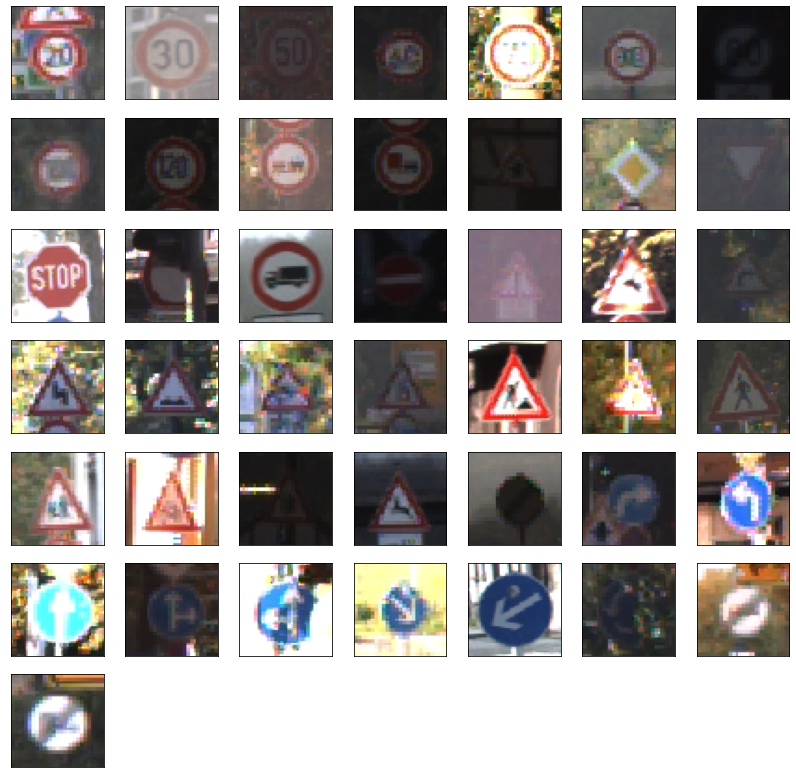

In [16]:
img_dir = pathlib.Path(trainDir)
plt.figure(figsize=(14,14))
index = 0
for i in range(numCat):
    plt.subplot(7, 7, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    sign = list(img_dir.glob(f'{i}/*'))[0]
    img = load_img(sign, target_size=(50, 50))
    plt.imshow(img)
plt.show()

In [8]:
for i in range(classes):
    path = os.path.join(currentPath,'dataset\Train',str(i))
    images = os.listdir(path)
    #getting the list of all the files directory
    #print(images)
    for a in images:
        try:
            image = Image.open(path+'\\'+a)
            image = image.resize((30,30))
            data.append(image)
            labels.append(i)
        except:
            print("Error loading images")
    print(str(i)+" loaded")
data = np.array(data)
labels = np.array(labels)


TypeError: int() argument must be a string, a bytes-like object or a number, not 'Image'